# Explicación

En este programa se analiza el comportamiento de las variables macroscópicas en función de beta y para distintos valores del campo externo.

# Paquetería necesaria

In [161]:
using PyPlot
using Interact
using LaTeXStrings
using CurveFit
using Polynomials

# Variables requeridas

In [20]:
function Inicializar_solo_una_vez(arg1,arg2)
    global L = arg1
    global temp_inicial = 0.4
    global temp_final = 8
    global δtemp = 0.1
    global temperatura = (temp_inicial:δtemp:temp_final)
    global β = 1./temperatura
    global h = arg2
    global card_β = length(β)
    global card_L = length(L)
    global energía_promedio = zeros(card_β,card_L)
    global magnetización_promedio = zeros(card_β,card_L)
    global parámetro_de_orden_promedio = zeros(card_β,card_L)
    global capacidad_calorífica = zeros(card_β,card_L)
    global susceptibilidad_magnética = zeros(card_β,card_L)
end

Inicializar_solo_una_vez (generic function with 1 method)

In [21]:
function Inicializar_variables(arg1)
    global caracterizacion = "WL2D_cuadrada_L_$(arg1)_Is_ferr_cam_10_f_0.0001"
    println(caracterizacion)
    global datos, cabeceras
    datos, cabeceras = readdlm("Entropia_2D_final/Entropia_2D_final_$(caracterizacion).txt", header=true)
    global l = size(datos)[1]
end

Inicializar_variables (generic function with 1 method)

# Definiendo funciones

## Funciones para  obtener observables macroscópicas

In [22]:
function Renormalización(i)
    constante_de_renormalización = 0.0
    for k in 1:l
        if constante_de_renormalización<=datos[k,3]-β[i]*(datos[k,1]-h*datos[k,2])
            constante_de_renormalización=datos[k,3]-β[i]*(datos[k,1]-h*datos[k,2])
        end
    end
    constante_de_renormalización
end 

Renormalización (generic function with 1 method)

In [23]:
function Variables_Macroscópicas_variando_β_con_L_y_h_fijas(i,j)
    función_de_partición_1D = 0.0
    función_de_partición_2D = 0.0
    energía = 0.0
    energía_cuadrada = 0.0
    magnetización = 0.0
    magnetización_cuadrada = 0.0
    parámetro_de_orden = 0.0
    exponente = 0.0
    renorm = Renormalización(i)
    β_i = β[i]
    L_j = L[j]
    for k in 1:l
        exponente = datos[k,3] - β_i*(datos[k,1] - h*datos[k,2]) - renorm
        función_de_partición_2D += exp(exponente)
        energía += abs(datos[k,1])*exp(exponente)
        energía_cuadrada += datos[k,1]*datos[k,1]*exp(exponente)
        magnetización += abs(datos[k,2])*exp(exponente)
        magnetización_cuadrada += datos[k,2]*datos[k,2]*exp(exponente)
        parámetro_de_orden += abs(datos[k,4])*exp(exponente)
    end
    energía_promedio[i,j] = energía/(función_de_partición_2D*L_j*L_j)
    magnetización_promedio[i,j] = magnetización/(función_de_partición_2D*L_j*L_j)
    parámetro_de_orden_promedio[i,j] = parámetro_de_orden/(función_de_partición_2D*L_j*L_j)
    capacidad_calorífica[i,j] = abs(energía_cuadrada - energía*energía)/(función_de_partición_2D*L_j^4)
    susceptibilidad_magnética[i,j] = abs(magnetización_cuadrada - magnetización*magnetización)/(función_de_partición_2D*L_j^4)
end

Variables_Macroscópicas_variando_β_con_L_y_h_fijas (generic function with 1 method)

In [24]:
function Obtener_variables_macroscópicas(longitudes,campo)
    Inicializar_solo_una_vez(longitudes,campo)
    for j in 1:card_L
        Inicializar_variables(L[j])
        for i in 1:card_β
            Variables_Macroscópicas_variando_β_con_L_y_h_fijas(i,j)
        end
    end
end

Obtener_variables_macroscópicas (generic function with 1 method)

In [25]:
function Agregar_otros_tamaños_del_sistema(L_extra)
    global card_L_extra = length(L_extra)
    append!(L,L_extra)
    global card_L = length(L)
    global energía_promedio = hcat(energía_promedio,zeros(card_β,card_L_extra))
    global magnetización_promedio = hcat(magnetización_promedio,zeros(card_β,card_L_extra))
    global parámetro_de_orden_promedio = hcat(parámetro_de_orden_promedio,zeros(card_β,card_L_extra))
    global capacidad_calorífica = hcat(capacidad_calorífica,zeros(card_β,card_L_extra))
    global susceptibilidad_magnética = hcat(susceptibilidad_magnética,zeros(card_β,card_L_extra))
    for j in (card_L-card_L_extra+1):card_L
        Inicializar_variables(L[j])
        for i in 1:card_β
            Variables_Macroscópicas_variando_β_con_L_y_h_fijas(i,j)
        end
    end
end            

Agregar_otros_tamaños_del_sistema (generic function with 1 method)

## Gáficas de observables

In [26]:
function Mostrar_varias_observables()
    fig = figure()
    @manipulate for i in 1:card_L
        withfig(fig) do
            subplot(221)
            #ylim(0,1.05)
            xlabel("Temperatura")
            ylabel("P.O.")
            plot(temperatura,parámetro_de_orden_promedio[:,i], label = latexstring("L=$(L[i])"))
            legend()
            subplot(222)
            xlabel("Temperatura")
            ylabel("Energía")
            plot(temperatura,energía_promedio[:,i], label = latexstring("L=$(L[i])"))
            legend()
            subplot(223)
            xlabel("Temperatura")
            ylabel("Capacidad calorífica")
            plot(temperatura,capacidad_calorífica[:,i], label = latexstring("L=$(L[i])"))
            legend()
            subplot(224)
            xlabel("Temperatura")
            ylabel("Susceptibilidad magnética")
            plot(temperatura,susceptibilidad_magnética[:,i], label = latexstring("L=$(L[i])"))
            legend()
        end
    end
end

Mostrar_varias_observables (generic function with 1 method)

## Gráfica de observables vs temperatura con $h$ fija

ARGUMENTOS DE LA FUNCIÓN:

***observables_macroscópicas***: conjunto de valores de la observable para cada valor de temperatura

***cadena***: Nombre del eje Y

In [27]:
function Grafica_observable_macroscópica_con_h_fija(valor_de_h,observable_macroscópica, cadena)
    xlabel("Temperatura")
    ylabel(cadena)
    title(cadena)
    plot(temperatura,observable_macroscópica, label = latexstring(L"h="*"$(valor_de_h)"))
    legend()
end

Grafica_observable_macroscópica_con_h_fija (generic function with 1 method)

## Gráfica de observable vs temperatura para varias $L$'s 

In [240]:
function Grafica_varias_observables_para_distintos_L(observable_macroscópica, cadena, v)
    for j in 1:card_L
        xlim(v)
        plot(temperatura,observable_macroscópica[:,j],label = latexstring("L=$(L[j])"))
        #legend (loc="upper right")
        xlabel("Temperatura")
        ylabel(cadena)
        title(cadena*" para varios "*L"L")
        #legend(loc=1, borderaxespad=-8.)
        legend()
    end
end

Grafica_varias_observables_para_distintos_L (generic function with 2 methods)

## Graficar observable para varias $L$'s, para encontrar exponentes y temperaturas críticas

### Usando Finite Size Scaling

In [239]:
function Graficar_variando_parámetros()    
    fig = figure(figsize=(6,6))
    @manipulate for T_c=1:.1:3, γ=1.3:.05:2, ν=0.7:.05:1.2
        withfig(fig) do
            xlim(-100,100)
            for j in 1:card_L
                plot((temperatura-T_c)*(L[j])^(1/ν), (susceptibilidad_magnética[:,j])*(L[j])^(-γ/ν),"o")
            end
        end
    end
end

Graficar_variando_parámetros (generic function with 1 method)

### Usando ajuste de rectas con las temperaturas críticas de cada L

In [120]:
function Encontrar_puntos_pseudocríticos(Observable)
    y = zeros(card_L)
    for i in 1:card_L
        y[i]=temperatura[indmax(Observable[:,i])]
    end
    return y
end

Encontrar_puntos_pseudocríticos (generic function with 2 methods)

In [134]:
function Ajuste_lineal_con_estadística(x,y)
    regresión = zeros(2)
    regresión[1],regresión[2]= linreg(x,y)
    N = length(x)
    χ_cuadrada = dot((y-regresión[1]-regresión[2]*x),(y-regresión[1]-regresión[2]*x))
    S_x = sum(x)
    S_y = sum(y)
    S_xx = dot(x,x)
    S_yy = dot(y,y)
    S_xy = dot(x,y)
    σ_y_cuadrada = χ_cuadrada/(N-2)
    push!(regresión,sqrt(σ_y_cuadrada))
    ϵ_a = sqrt((N/(N*S_xx-S_x*S_x))*σ_y_cuadrada)
    ϵ_b = sqrt((S_xx/(N*S_xx-S_x*S_x))*σ_y_cuadrada)
    R_cuadrada =  (N*S_xy-S_x*S_y)^2 / ((N*S_xx-S_x*S_x)*(N*S_yy-S_y*S_y))
    push!(regresión, R_cuadrada)
    push!(regresión,ϵ_a)
    push!(regresión,ϵ_b)
    return regresión
end

Ajuste_lineal_con_estadística (generic function with 1 method)

In [180]:
function Ajustar_pseudo_críticos(Observable)
    y=Encontrar_puntos_pseudocríticos(Observable)
    fig = figure()
    @manipulate for ν in 0.5:.1:1.5
        withfig(fig) do
            x = L.^(-1/ν)
            ajuste =  Ajuste_lineal_con_estadística(x,y)
            #println(ajuste)
            plot(x,y,"o")
            plot(x, (ajuste[1])+x*(ajuste[2]), label = latexstring("y=$(round(ajuste[1],3))+$(round(ajuste[2],3))x")*"\n"*latexstring("R^2=$(round(ajuste[4],3))"))
            legend()
        end
    end
end 

Ajustar_pseudo_críticos (generic function with 1 method)

In [253]:
function Ajustar_pseudo_críticos(Observable,ν)
    y=Encontrar_puntos_pseudocríticos(Observable)
    fig = figure()
    x = L.^(-1/ν)
    ajuste =  Ajuste_lineal_con_estadística(x,y)
    #println(ajuste)
    plot(x,y,"o")
    plot(x, (ajuste[1])+x*(ajuste[2]), label = latexstring("y=$(round(ajuste[1],3))+$(round(ajuste[2],3))x")*"\n"*latexstring("R^2=$(round(ajuste[4],3))"))
    legend()
end 

Ajustar_pseudo_críticos (generic function with 2 methods)

## Graficar datos y ajustar con un polinomio de grado N

## Graficar observable para varias $L$'s, con $h$ fija y temperatura  variable

## Obtener resultados para varias $L$'s 

# Aquí acaban las funciones

In [31]:
Obtener_variables_macroscópicas([8,9,16,32,64],0)

WL2D_cuadrada_L_8_Is_ferr_cam_10_f_0.0001
WL2D_cuadrada_L_9_Is_ferr_cam_10_f_0.0001
WL2D_cuadrada_L_16_Is_ferr_cam_10_f_0.0001
WL2D_cuadrada_L_32_Is_ferr_cam_10_f_0.0001
WL2D_cuadrada_L_64_Is_ferr_cam_10_f_0.0001


Interact.Slider{Int64}(Signal{Int64}(2, nactions=0),"i",2,1:3,true)

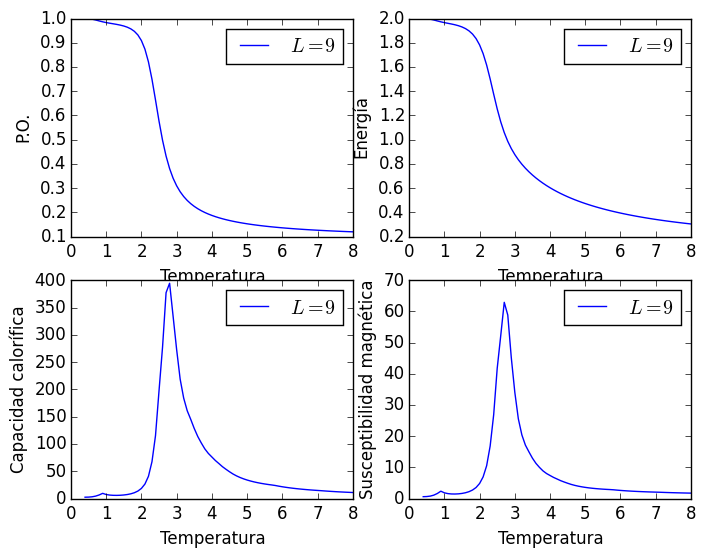

In [177]:
Mostrar_varias_observables()

In [324]:
Agregar_otros_tamaños_del_sistema([32,64])

WL2D_cuadrada_L_32_Is_ferr_cam_10_f_0.0001
WL2D_cuadrada_L_64_Is_ferr_cam_10_f_0.0001


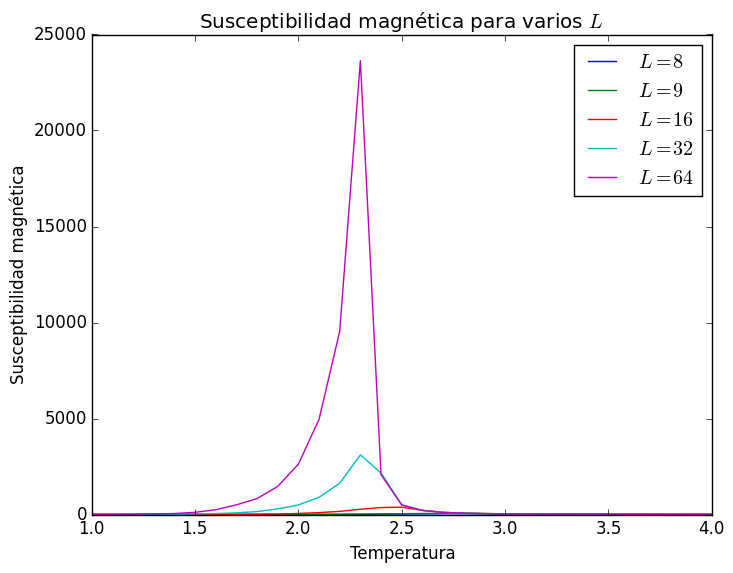

In [251]:
Grafica_varias_observables_para_distintos_L(susceptibilidad_magnética,"Susceptibilidad magnética",(1,4))
savefig("SM-var-L-h-0-fija-Is-ferro-cuad.pdf")

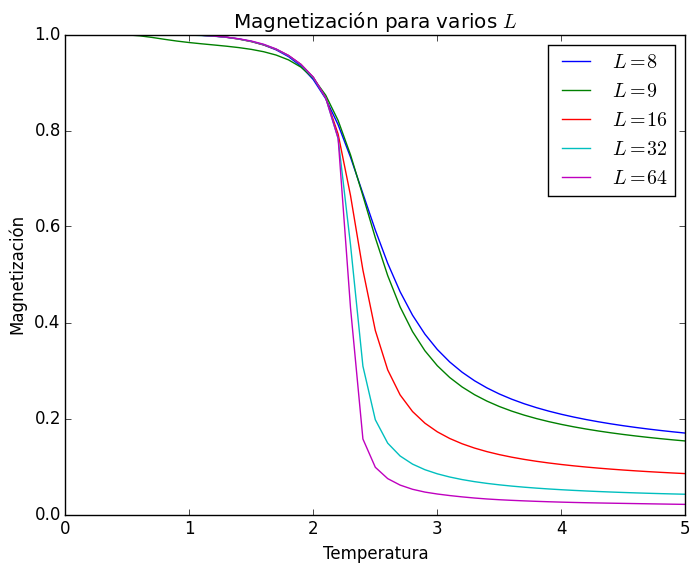

In [248]:
Grafica_varias_observables_para_distintos_L(parámetro_de_orden_promedio,"Magnetización",(0,5))
savefig("PO-var-L-h-0-fija-Is-ferro-cuad.pdf")

In [247]:
savefig("PO-var-L-h-0-fija-Is-ferro-cuad.pdf")

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x34851ae48>)

Interact.Slider{Float64}(Signal{Float64}(2.0, nactions=0),"T_c",2.0,1.0:0.1:3.0,true)

Interact.Slider{Float64}(Signal{Float64}(1.65, nactions=0),"γ",1.65,1.3:0.05:2.0,true)

Interact.Slider{Float64}(Signal{Float64}(0.95, nactions=0),"ν",0.95,0.7:0.05:1.2,true)

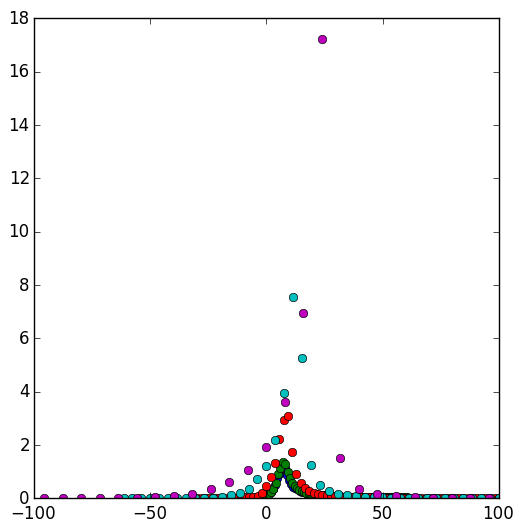

In [196]:
Graficar_variando_parámetros()

Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"ν",1.0,0.5:0.1:1.5,true)

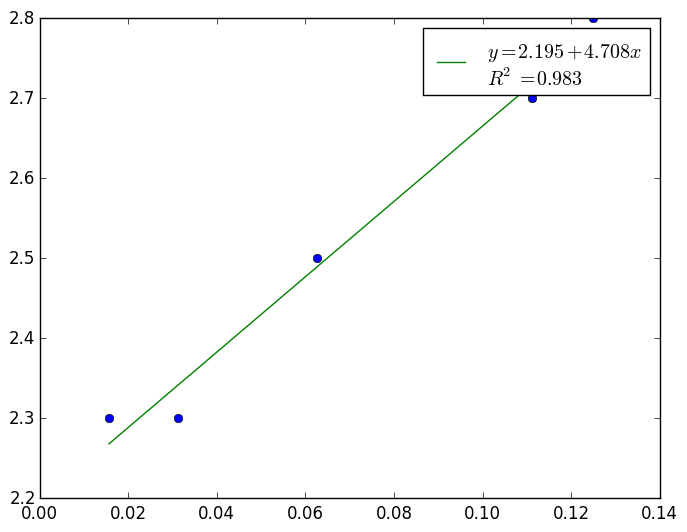

In [228]:
Ajustar_pseudo_críticos(susceptibilidad_magnética)


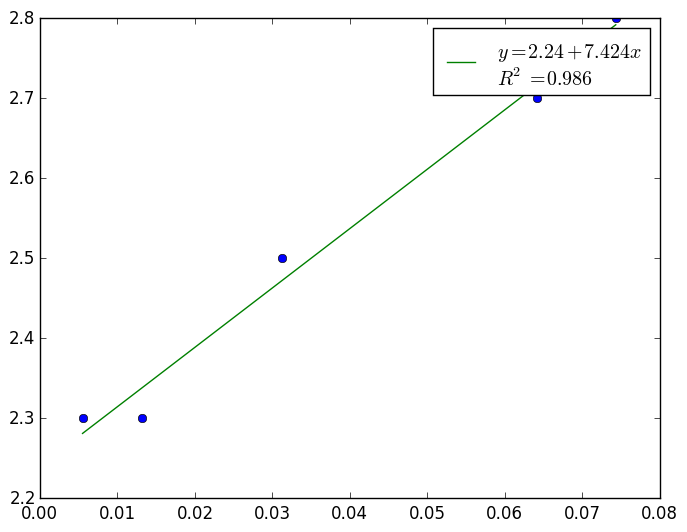

In [254]:
Ajustar_pseudo_críticos(susceptibilidad_magnética,.8)
savefig("ajustelineal-T-vs-L-h-0-fija-Is-ferro-cuad-con-SM.pdf")

In [234]:
writedlm("dat_sup.txt",vcat(reshape(vcat(0,L),1,6), [temperatura susceptibilidad_magnética]))

In [235]:
L

5-element Array{Int64,1}:
  8
  9
 16
 32
 64